The idea here is to plot the trade networks using a threshold $s$ to plot only (normalised) trade > $s$
This may be useful for dense networks, as a way of clearing out noise see [this](https://github.com/maxbiostat/papers/blob/master/PAPERS/proceedings/DINCON_2011_Carvalho%20et%20al.pdf) for an idea of how that works out.

In [1]:
source("../aux/spatnet_aux.R")

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: spdep
Loading required package: Matrix
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`
Loading required package: RColorBrewer


In [2]:
library(maptools)
library(spdep)
library(RColorBrewer)

In [3]:
data(wrld_simpl)
world <- wrld_simpl

Countries <- c("Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
               "Paraguay", "Peru", "Uruguay", "Venezuela")  

In [4]:
which.polys <- vector(mode = "list", length(Countries))
for (c in 1:length(Countries)){
  which.polys[[c]] <- grep(paste(Countries[c]), world$NAME)
}
SA <- world[unlist(which.polys), ]

In [6]:
load(file = "../../DATA/TRADE_DATA/tradeArray_Cattle.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Goats.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Pigs.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Sheep.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Horses.RData")

In [7]:
TotalCattle <- apply(Cattle, c(1, 2), sum)
TotalGoats <- apply(Goats, c(1, 2), sum)
TotalPigs <- apply(Pigs, c(1, 2), sum)
TotalSheep <- apply(Sheep, c(1, 2), sum)
TotalHorses <- apply(Horses, c(1, 2), sum)

In [8]:
regulariseNames <- function(mat){
  Names <- gsub(" \\(Bolivarian Republic of\\)",
                "", gsub(" \\(Plurinational State of\\)", "", colnames(mat)) )
  colnames(mat) <- rownames(mat) <- Names
  return(mat)
}
#

Mcattle <- regulariseNames(TotalCattle)
Mgoats <- regulariseNames(TotalGoats)
Mpigs <- regulariseNames(TotalPigs)
Msheep <- regulariseNames(TotalSheep)
Mhorses <- regulariseNames(TotalHorses)

In [9]:
r <- c(0, .25) ## thresholds

Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in r

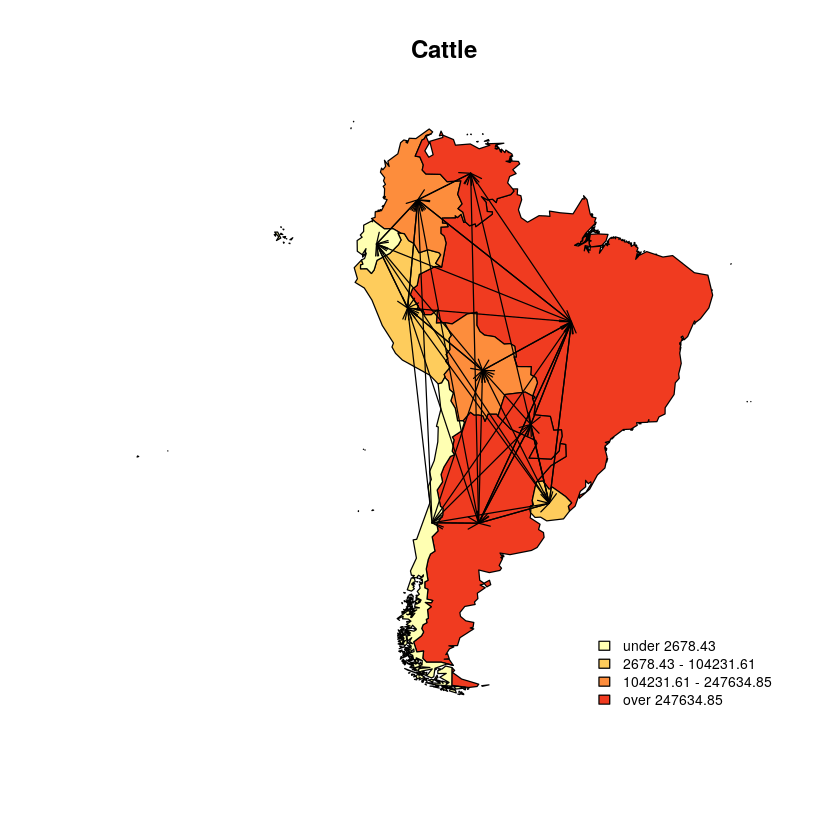

Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

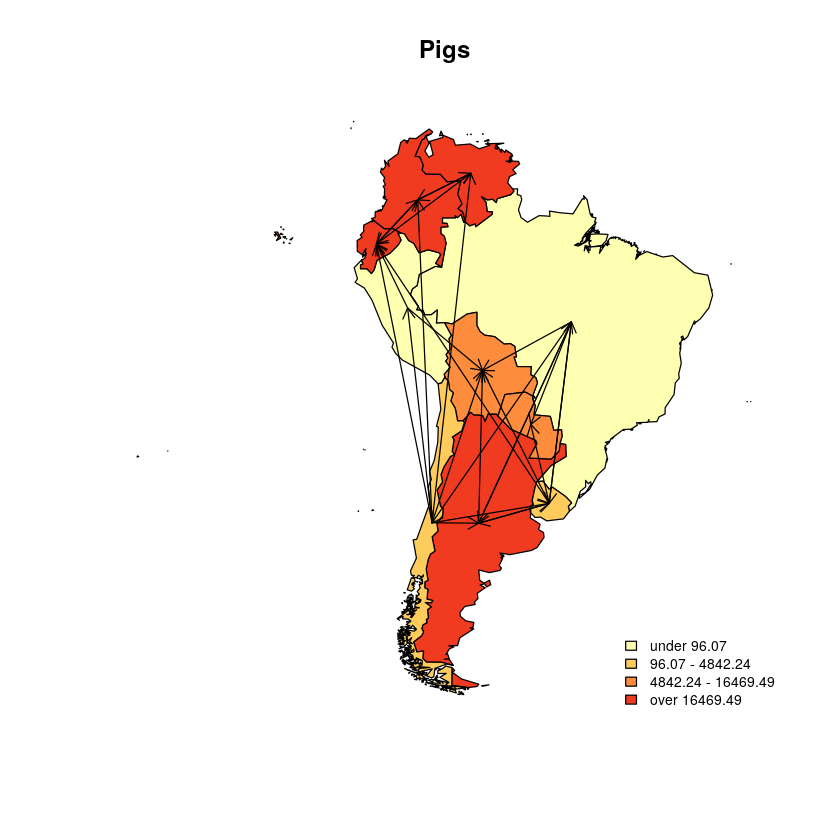

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

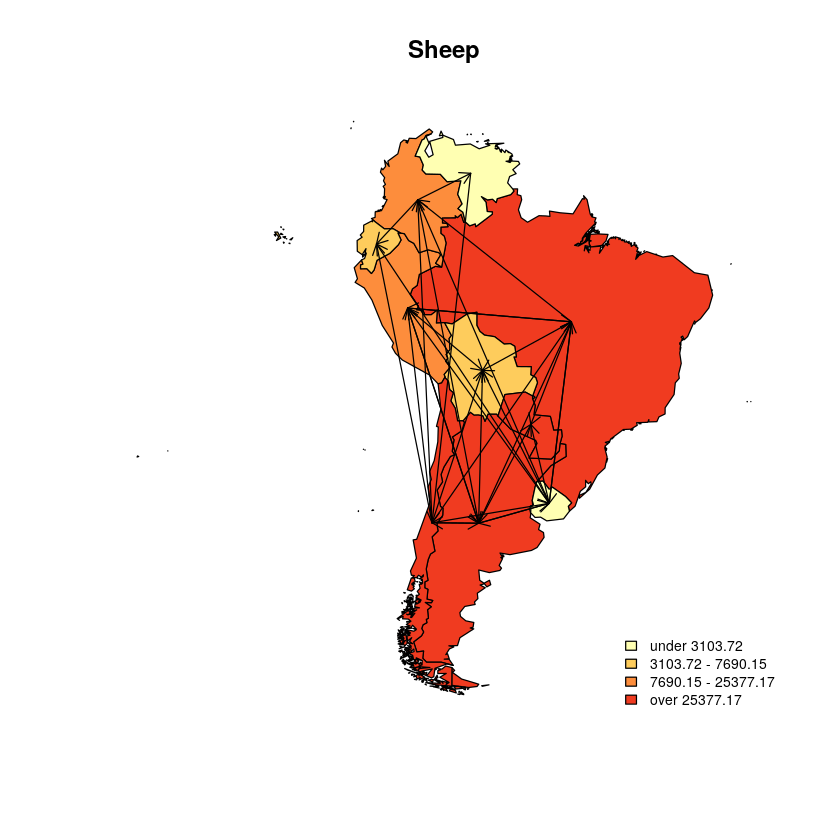

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

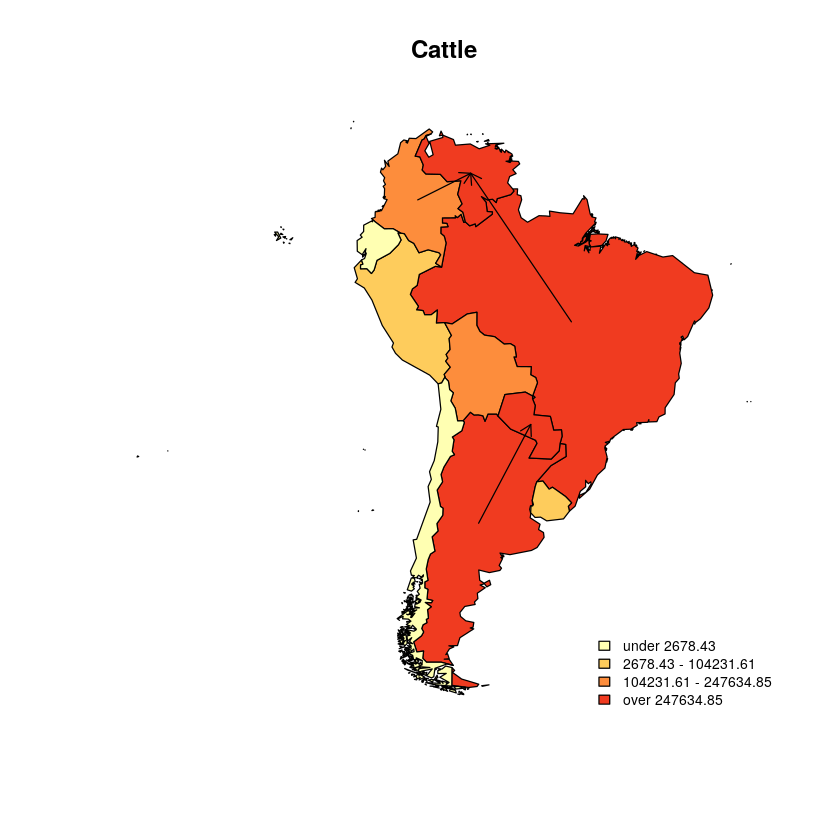

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

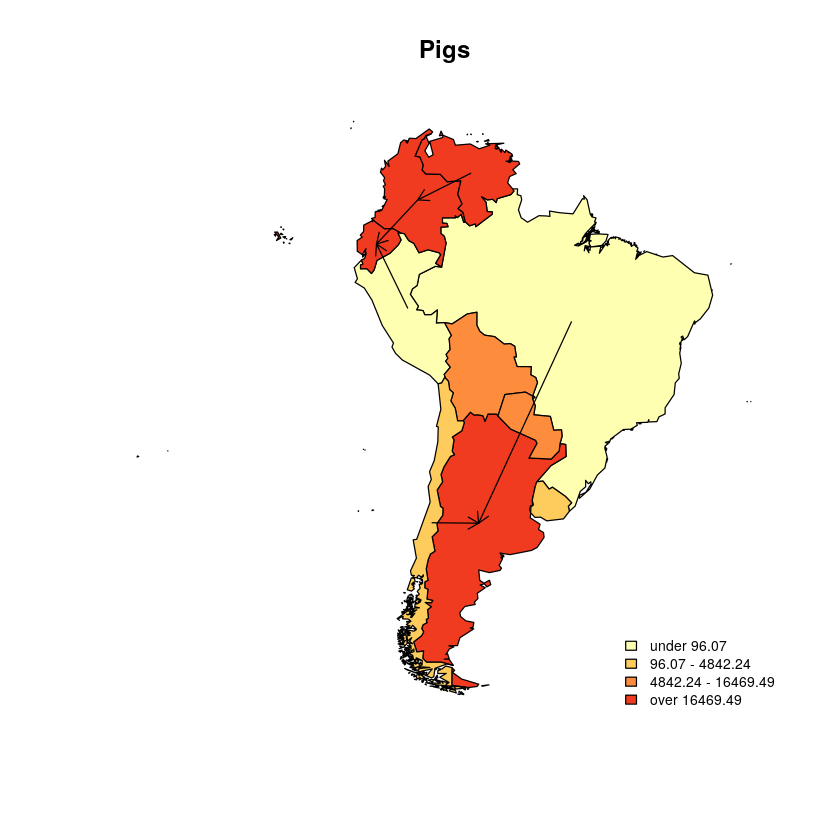

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

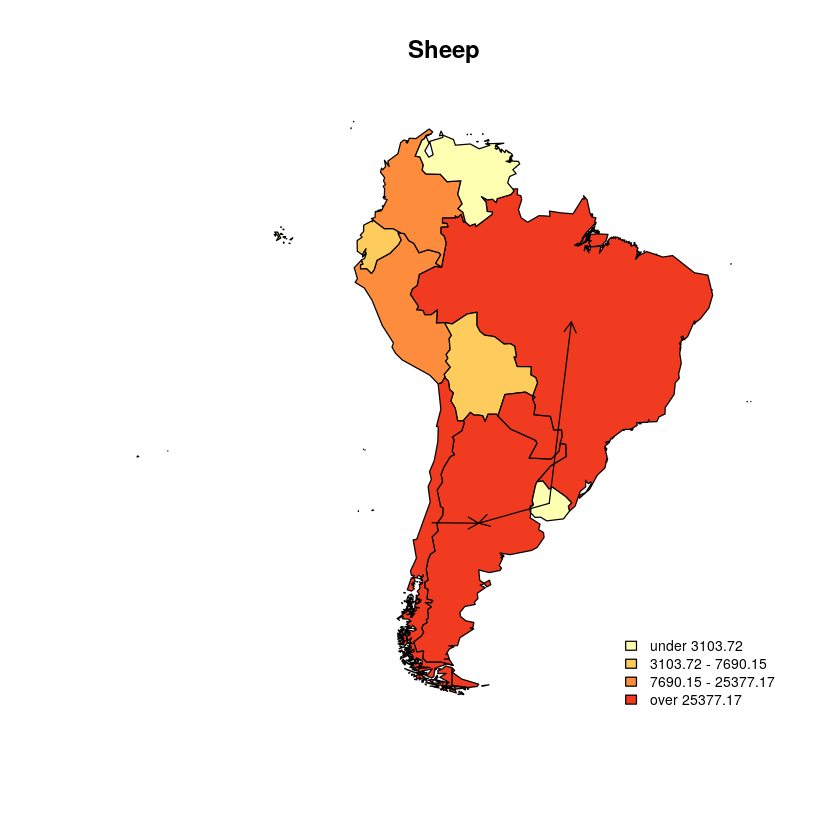

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

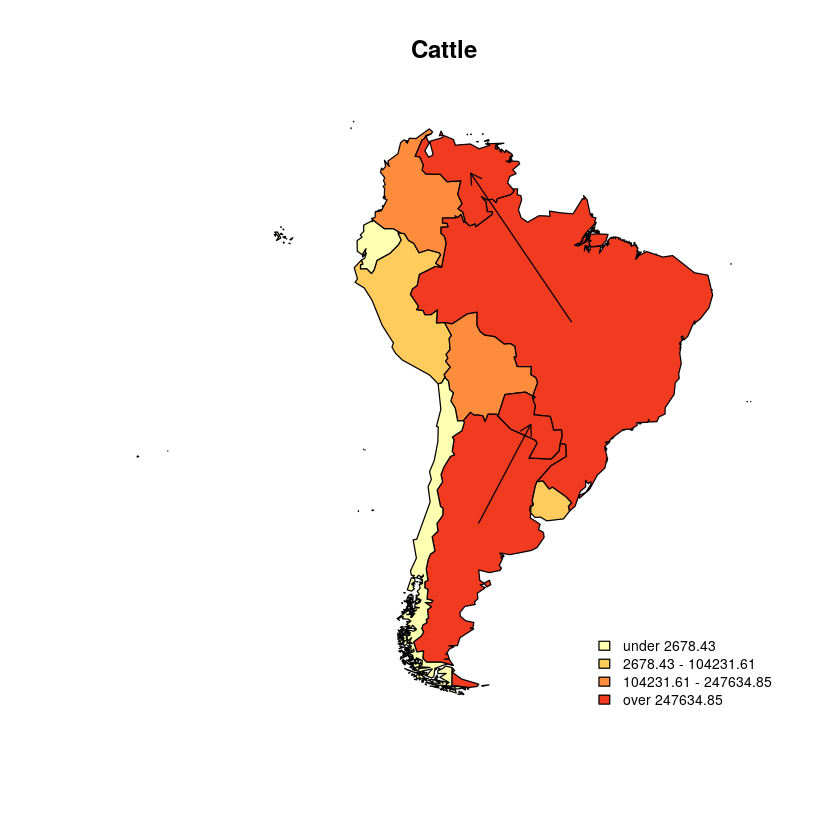

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

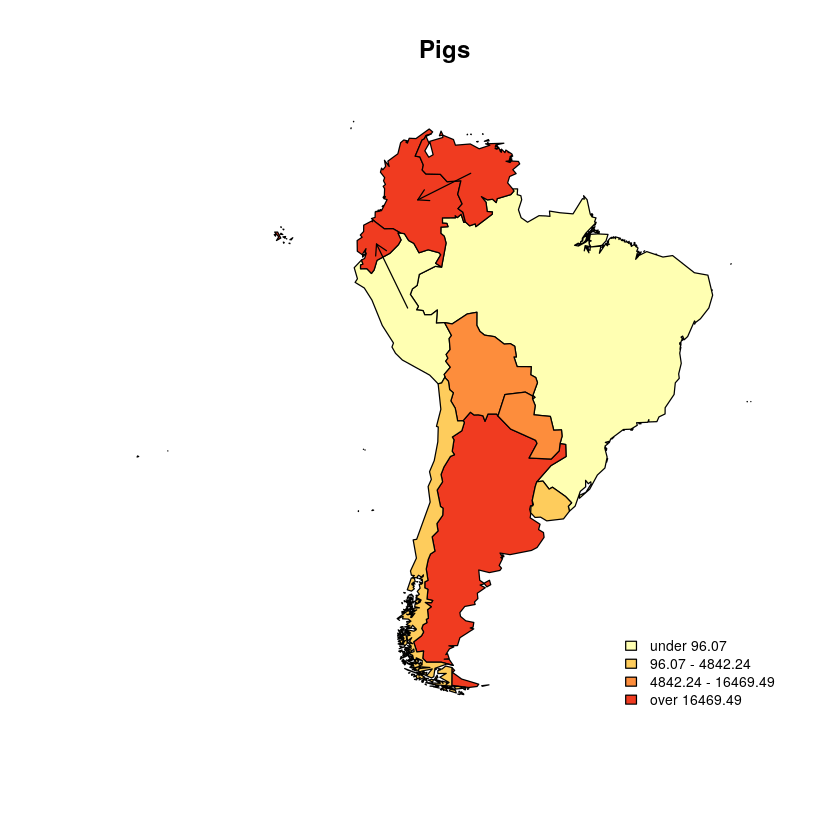

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

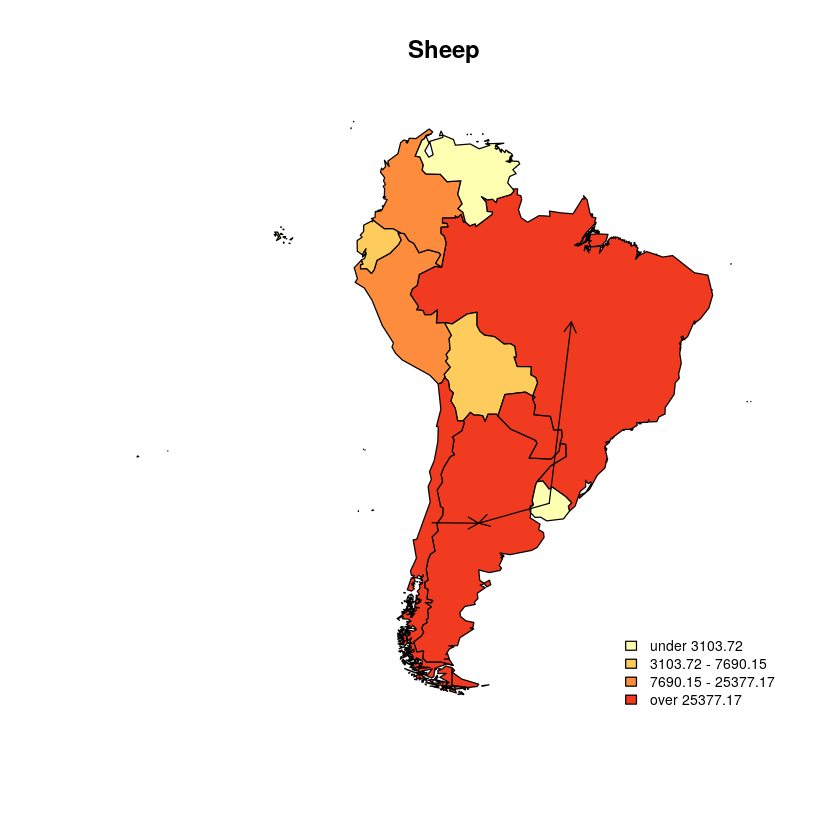

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

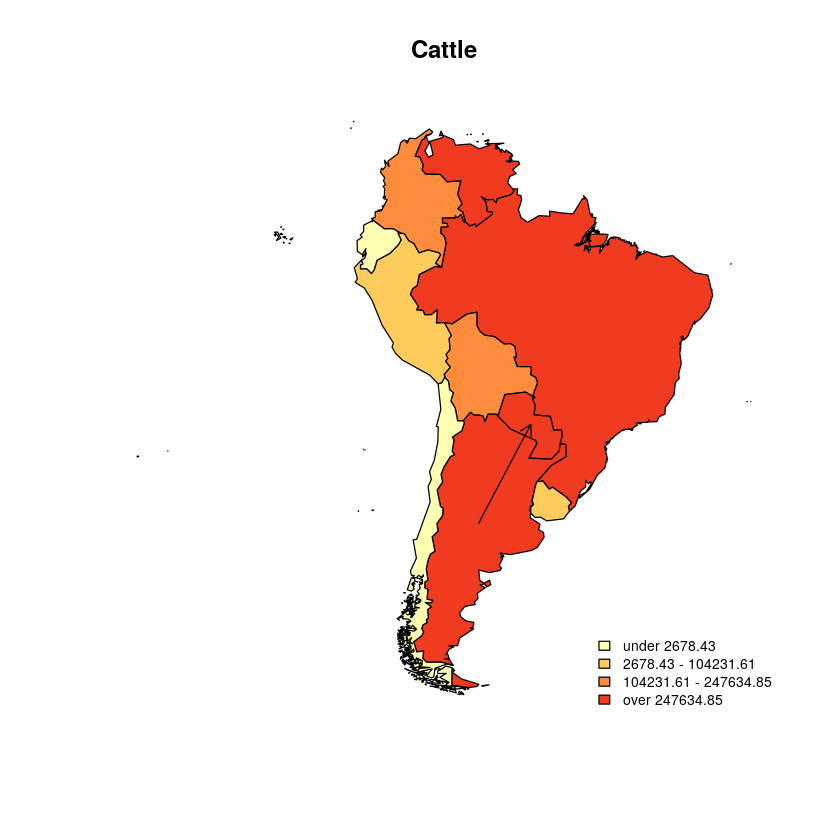

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

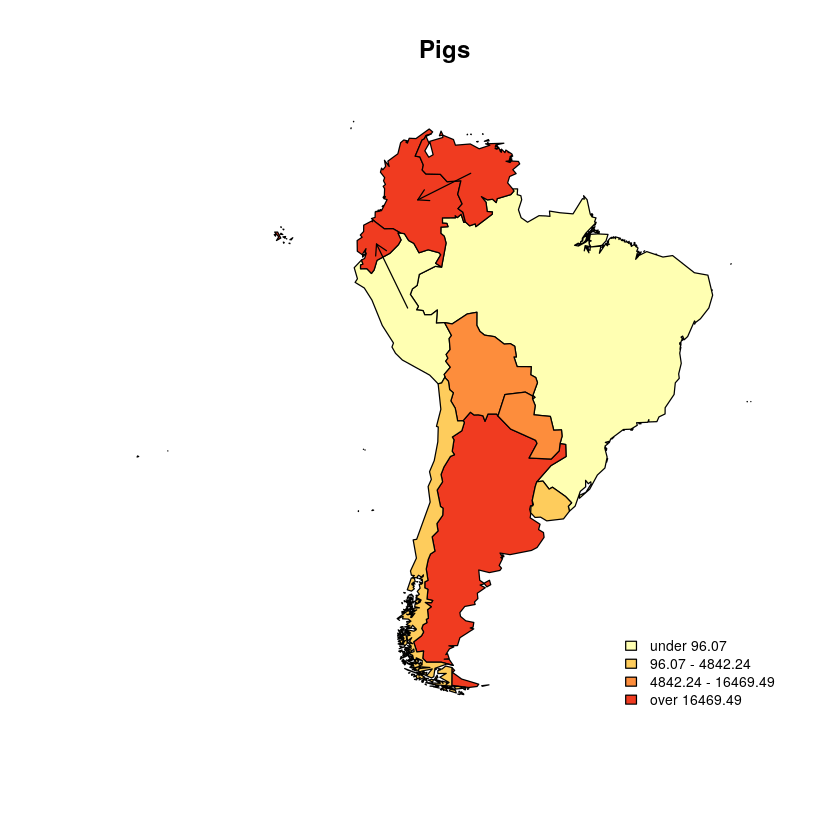

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

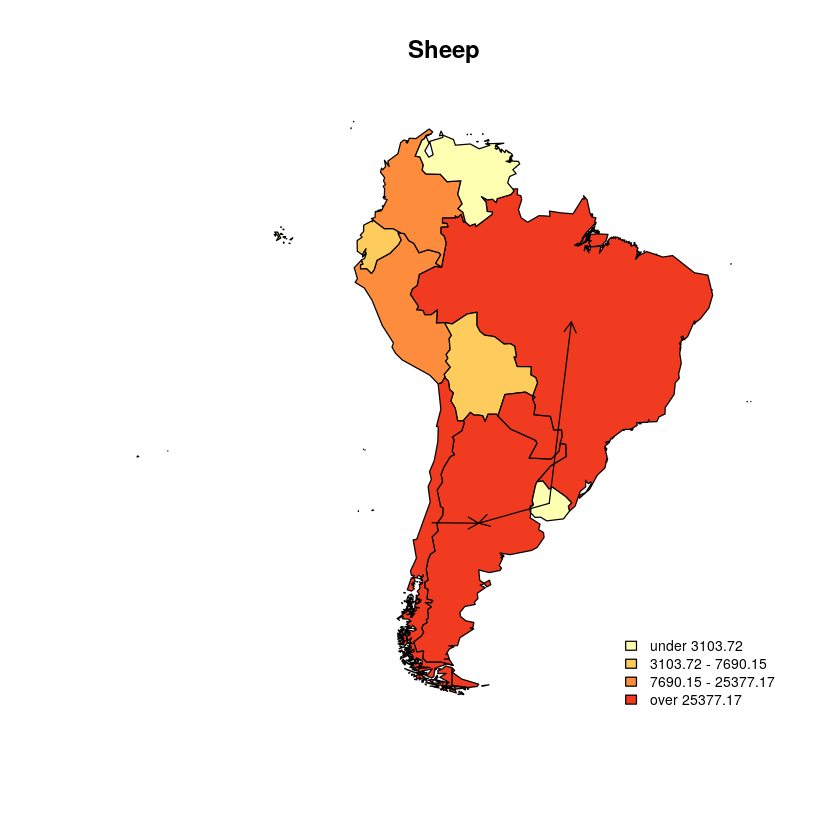

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

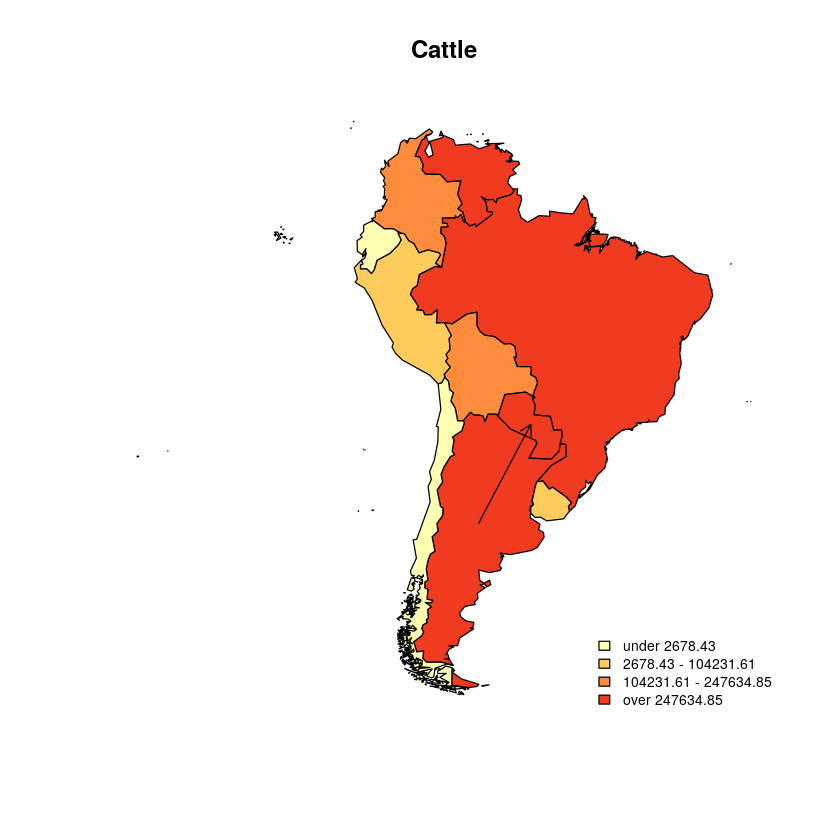

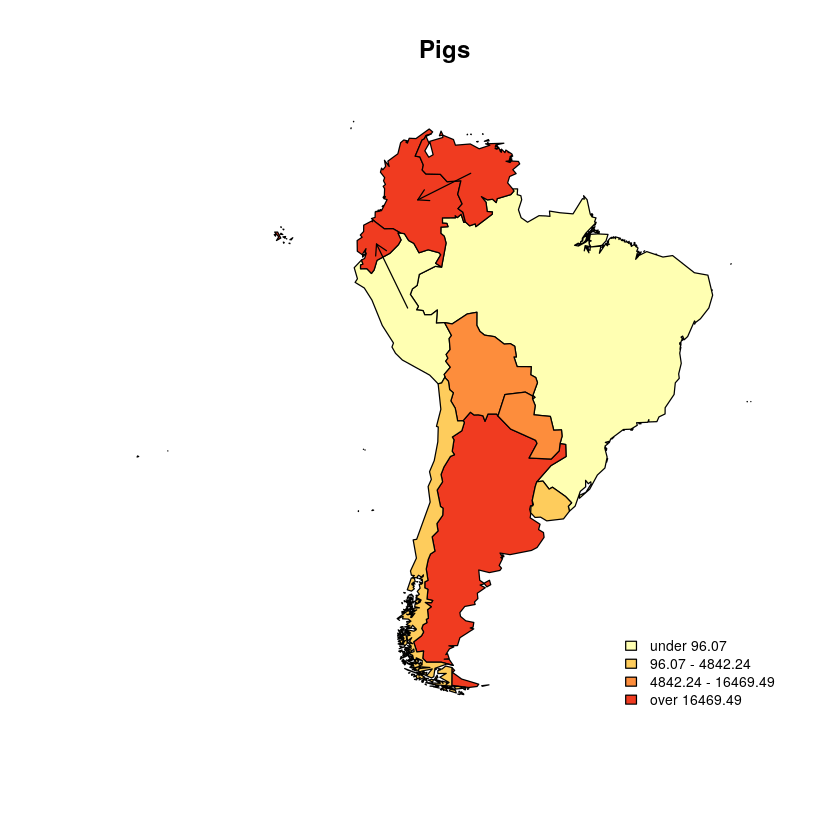

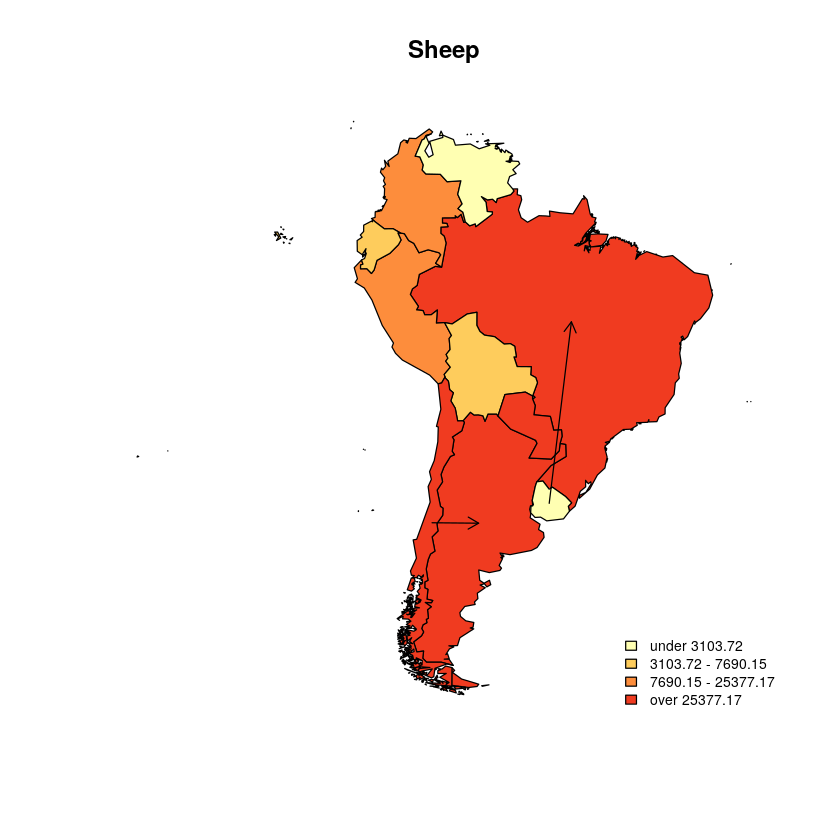

In [13]:
for(s in seq(r[1], r[2], length.out = 5)){

plot.spatnet(SA, nmat = Mcattle, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Cattle", ltitle = " ")

plot.spatnet(SA, nmat = Mpigs, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Pigs", ltitle = " ")

plot.spatnet(SA, nmat = Msheep, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Sheep", ltitle = " ")
}

## Exporting

In [12]:
for(s in seq(r[1], r[2], length.out = 5)){

pdf(paste("../../FIGURES/PLOTS/tradenets_cattle_s=", s, ".pdf", sep = ""))  
plot.spatnet(SA, nmat = Mcattle, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Cattle", ltitle = " ")
dev.off()

pdf(paste("../../FIGURES/PLOTS/tradenets_pig_s=", s, ".pdf", sep = ""))  
plot.spatnet(SA, nmat = Mpigs, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Pigs", ltitle = " ")
dev.off()

pdf(paste("../../FIGURES/PLOTS/tradenets_sheep_s=", s, ".pdf", sep = ""))  
plot.spatnet(SA, nmat = Msheep, s = s, net = TRUE, dir = "to", brk = 5, mtitle = "Sheep", ltitle = " ")
dev.off()
}

Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in arrows(x[i], y[i], x[j], y[j], col = col[i], length = length, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in nb2listw(res$neighbours, glist = res$weights, styl